# AI HW
Author: Ahn, Chanwoo  
Student number: 2016145118  
Date: May 24, 2023  

In [53]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt

print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())


True
True


In [54]:
# device = torch.device("mps")
device = torch.device("cpu")

drag_lift = np.genfromtxt("./data/drag-lift.csv", dtype=np.float32, delimiter=",", skip_header=1)
print(drag_lift.shape)
drag_lift


(11, 3)


array([[6.00e+00, 3.97e-03, 1.03e-01],
       [7.00e+00, 5.23e-03, 1.42e-01],
       [8.00e+00, 6.66e-03, 1.86e-01],
       [9.00e+00, 8.25e-03, 2.37e-01],
       [1.00e+01, 9.99e-03, 2.95e-01],
       [1.10e+01, 1.19e-02, 3.58e-01],
       [1.20e+01, 1.39e-02, 4.28e-01],
       [1.30e+01, 1.61e-02, 5.04e-01],
       [1.40e+01, 1.85e-02, 5.87e-01],
       [1.50e+01, 2.10e-02, 6.75e-01],
       [1.60e+01, 2.36e-02, 7.70e-01]], dtype=float32)

/var/folders/1t/1933h3yn0wdbfjh6xfzgspvw0000gn/T/ipykernel_60414/994467187.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


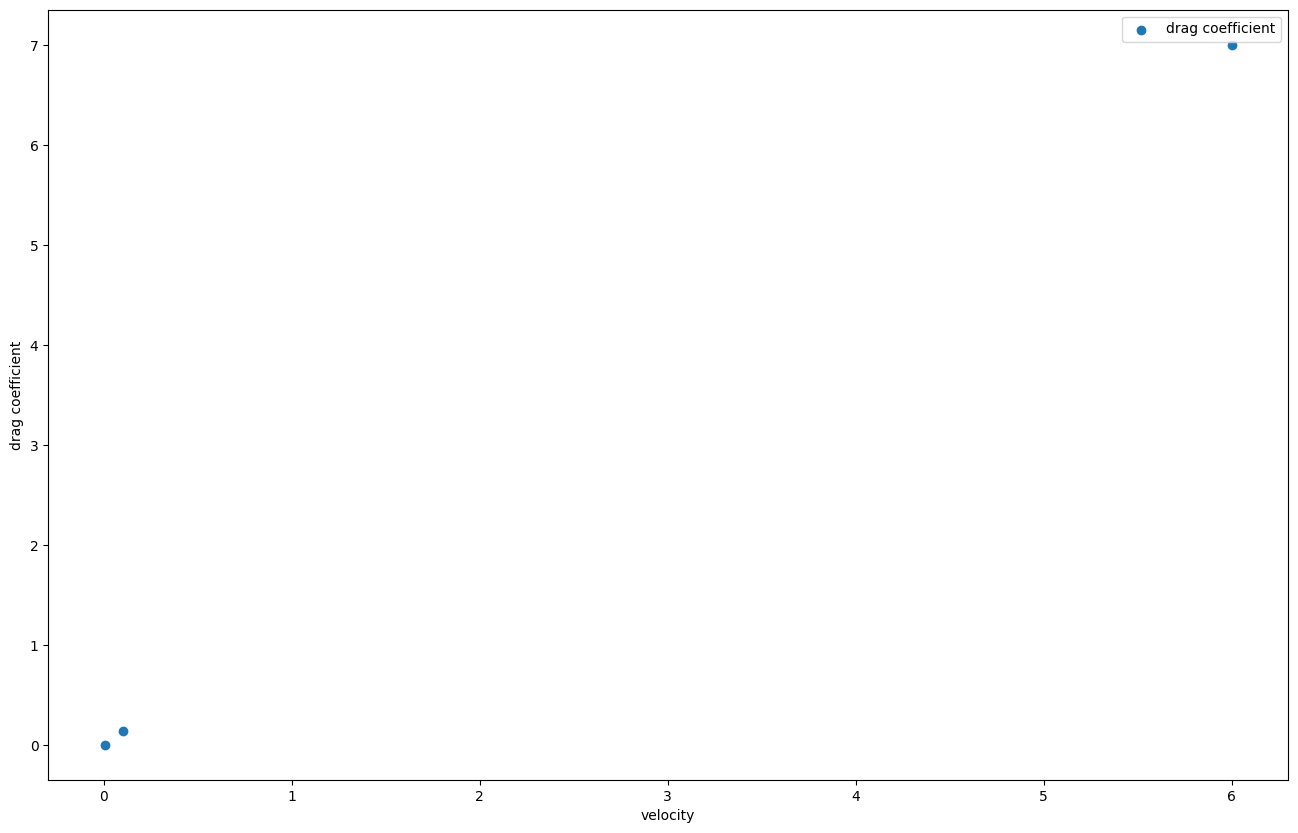

In [55]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=drag_lift[0], y=drag_lift[1], label="drag coefficient")
ax.legend()
ax.set_xlabel("velocity")
ax.set_ylabel("drag coefficient")
fig.show()

/var/folders/1t/1933h3yn0wdbfjh6xfzgspvw0000gn/T/ipykernel_60414/2660975382.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


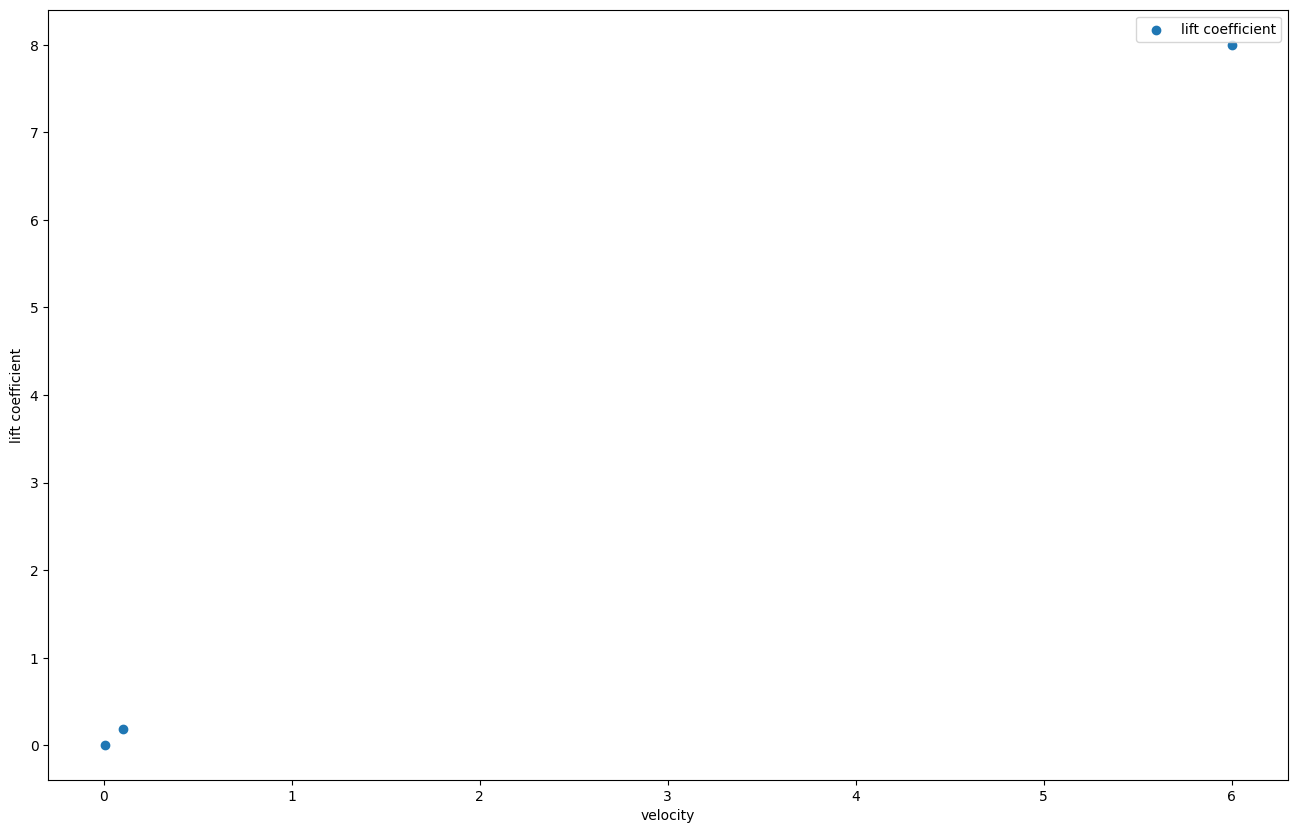

In [56]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=drag_lift[0], y=drag_lift[2], label="lift coefficient")
ax.legend()
ax.set_xlabel("velocity")
ax.set_ylabel("lift coefficient")
fig.show()

In [57]:
class NN(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.lin1 = nn.Linear(1,64)
        self.lin2 = nn.Linear(64, 64)
        self.lin3 = nn.Linear(64, 2)

    def forward(self, x):
        x = f.tanh(self.lin1(x))
        x = f.tanh(self.lin2(x))
        return self.lin3(x)

In [58]:
model = NN().to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
mse = nn.MSELoss()

In [59]:
test_indices = [2, 6, 9]
train_indices = [i for i in range(drag_lift.shape[0]) if i not in test_indices]

train_data = np.take(drag_lift, train_indices, axis=0)
test_data = np.take(drag_lift, test_indices, axis=0)

print(train_data.shape)
print(test_data.shape)

print(train_data)
print(test_data)

(8, 3)
(3, 3)
[[6.00e+00 3.97e-03 1.03e-01]
 [7.00e+00 5.23e-03 1.42e-01]
 [9.00e+00 8.25e-03 2.37e-01]
 [1.00e+01 9.99e-03 2.95e-01]
 [1.10e+01 1.19e-02 3.58e-01]
 [1.30e+01 1.61e-02 5.04e-01]
 [1.40e+01 1.85e-02 5.87e-01]
 [1.60e+01 2.36e-02 7.70e-01]]
[[8.00e+00 6.66e-03 1.86e-01]
 [1.20e+01 1.39e-02 4.28e-01]
 [1.50e+01 2.10e-02 6.75e-01]]


In [60]:
train_x = torch.from_numpy(train_data[:, :1])
train_y = torch.from_numpy(train_data[:, 1:3])
test_x = torch.from_numpy(test_data[:, :1])
test_y = torch.from_numpy(test_data[:, 1:3])

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x)
print(train_y)
print(test_x)
print(test_y)


torch.Size([8, 1])
torch.Size([8, 2])
torch.Size([3, 1])
torch.Size([3, 2])
tensor([[ 6.],
        [ 7.],
        [ 9.],
        [10.],
        [11.],
        [13.],
        [14.],
        [16.]])
tensor([[0.0040, 0.1030],
        [0.0052, 0.1420],
        [0.0082, 0.2370],
        [0.0100, 0.2950],
        [0.0119, 0.3580],
        [0.0161, 0.5040],
        [0.0185, 0.5870],
        [0.0236, 0.7700]])
tensor([[ 8.],
        [12.],
        [15.]])
tensor([[0.0067, 0.1860],
        [0.0139, 0.4280],
        [0.0210, 0.6750]])


In [61]:
train_metric = []
test_metric = []

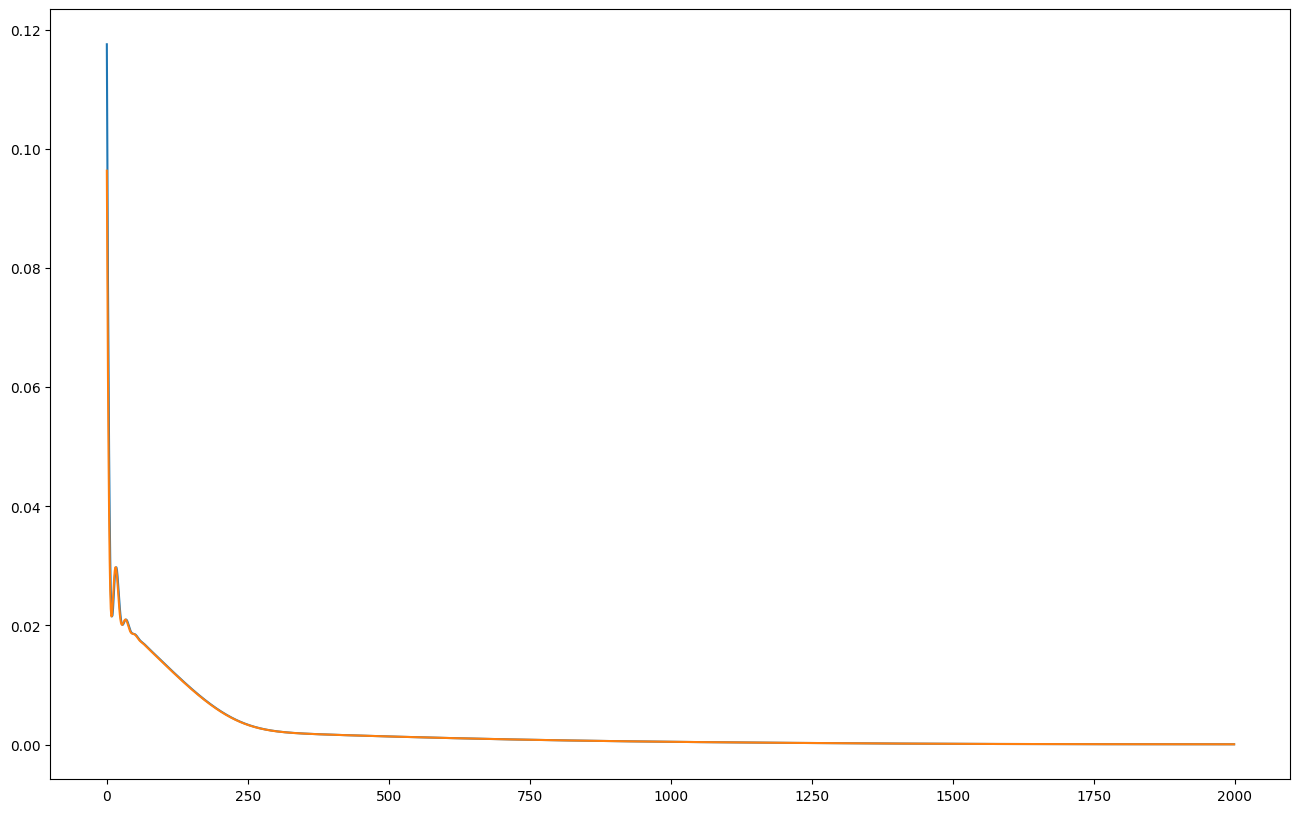

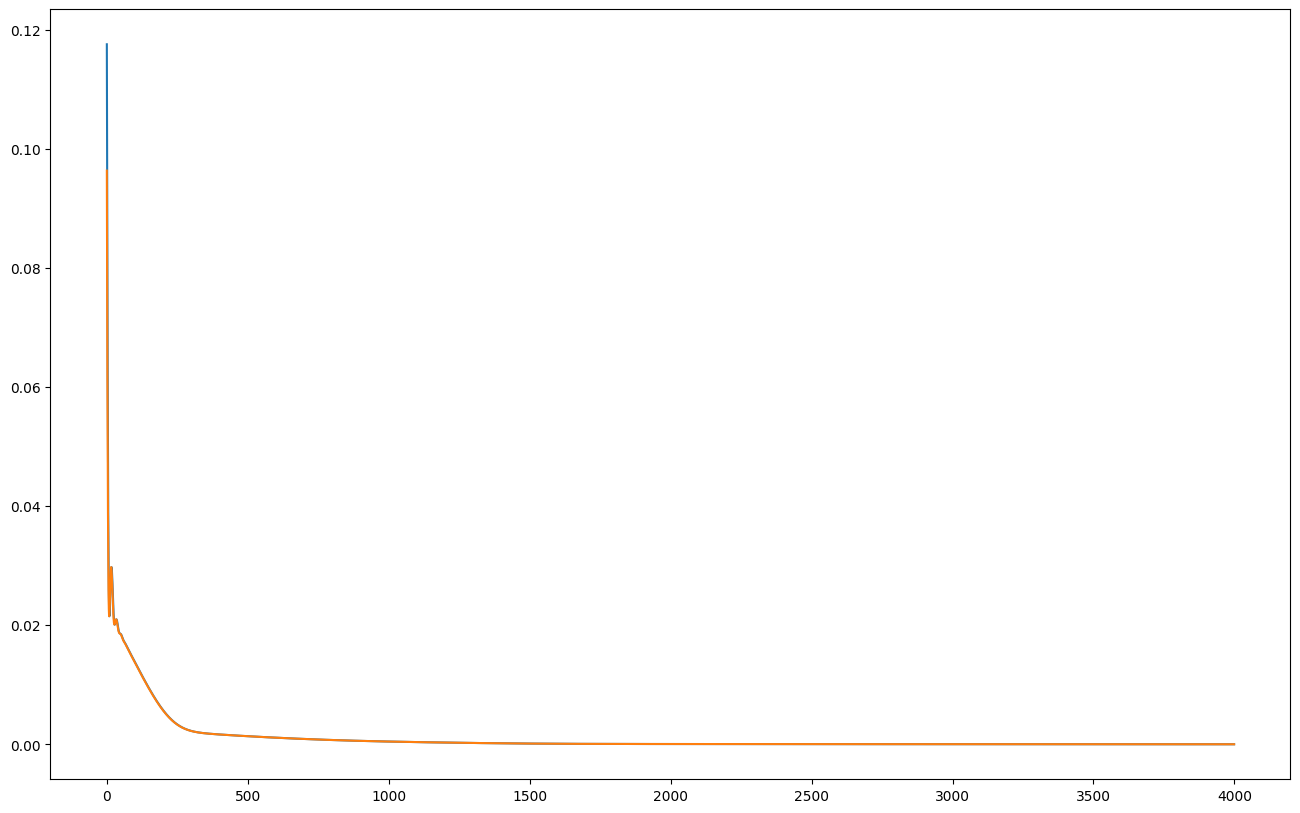

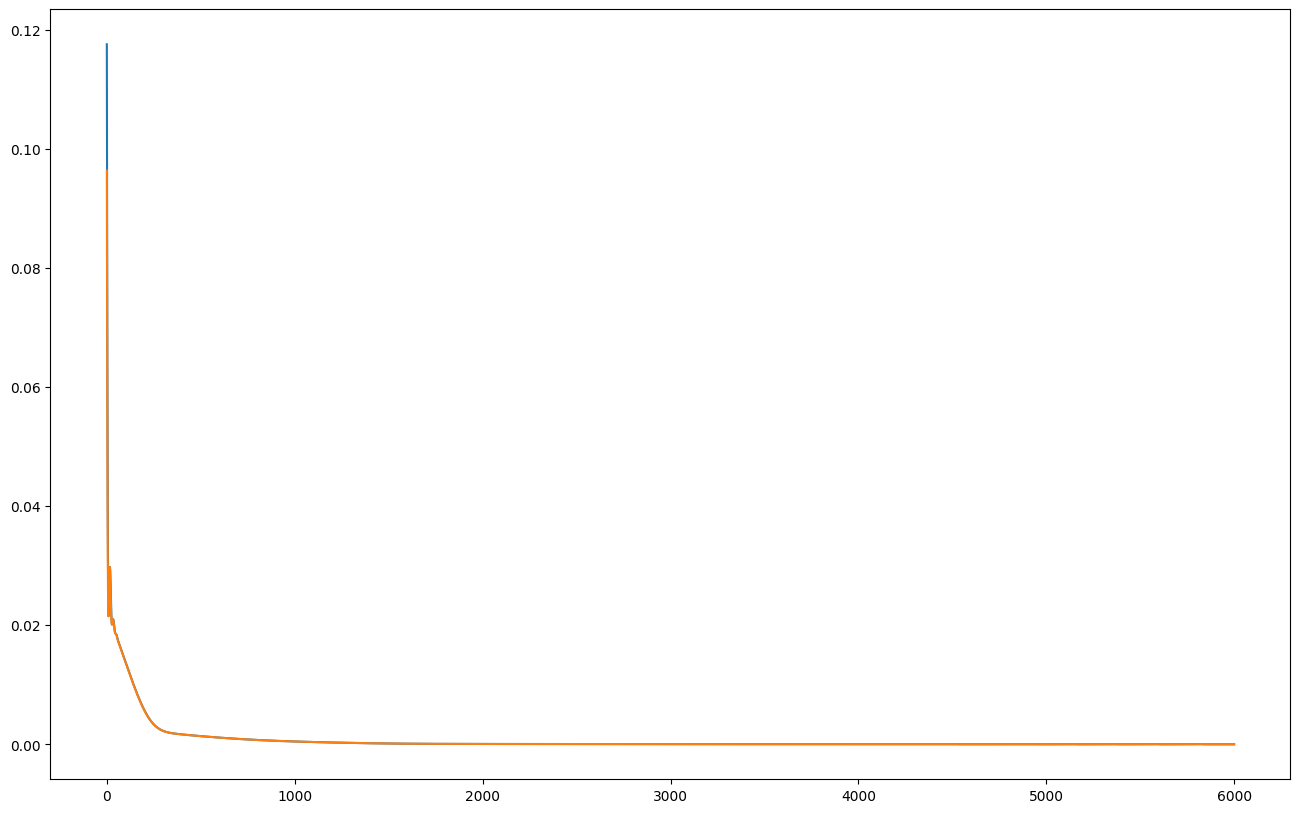

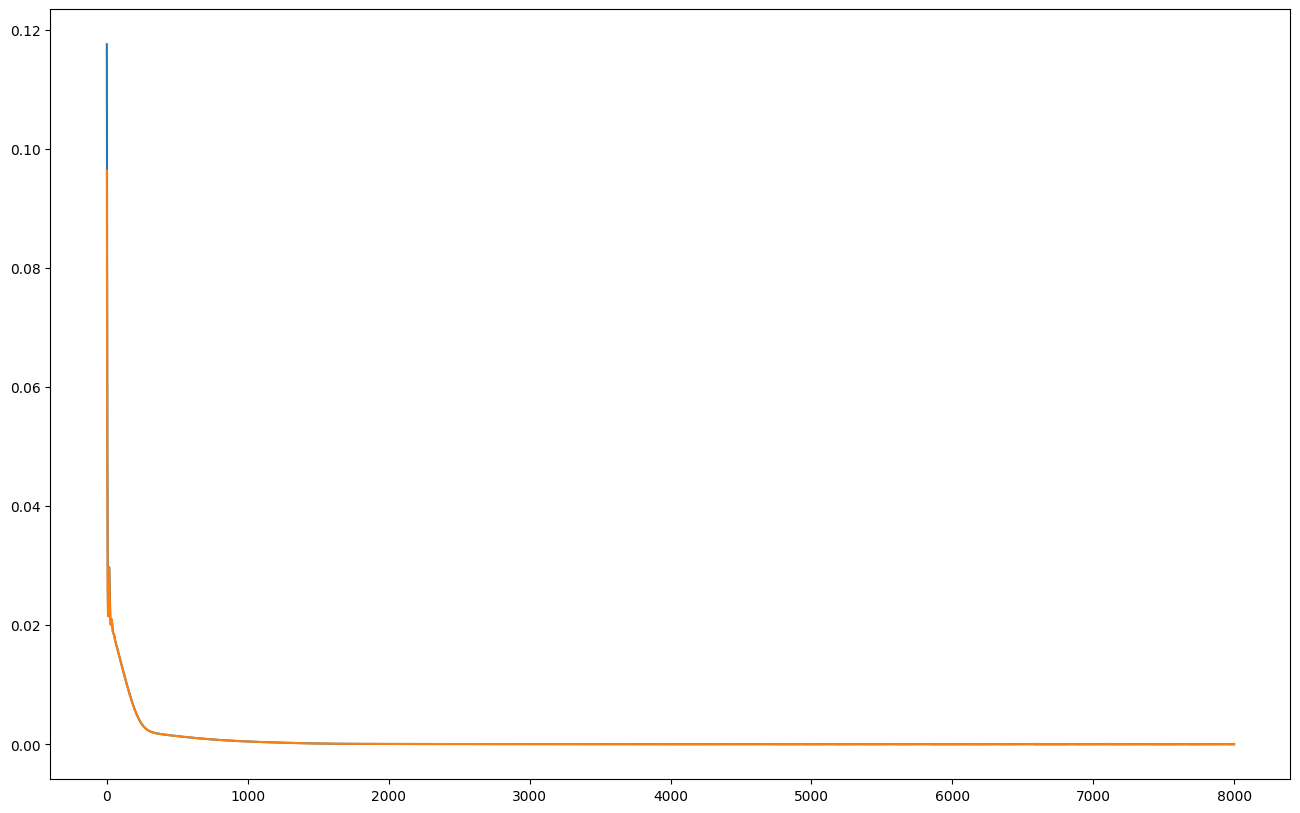

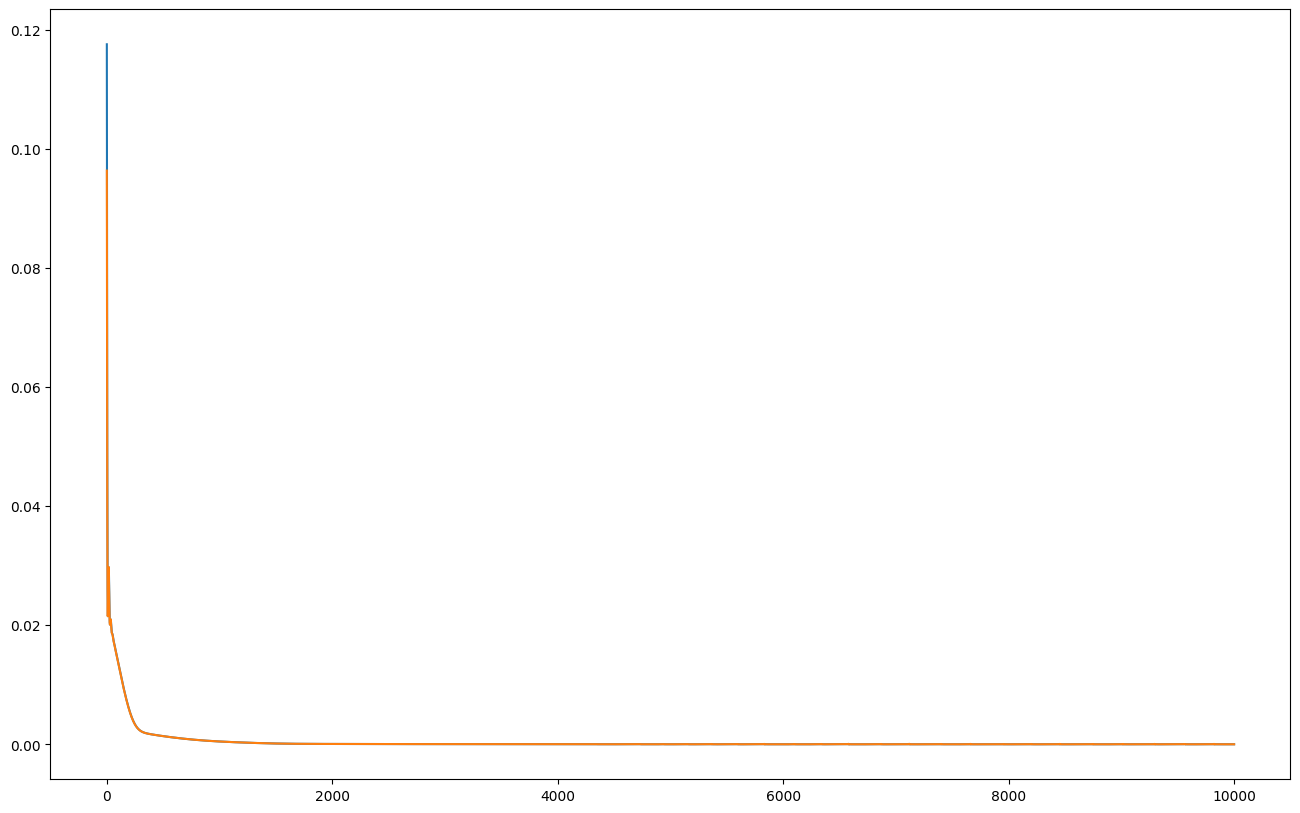

In [62]:
num_epoch = 10000

for epoch in range(1, num_epoch + 1):
    model.train()
    optimizer.zero_grad()

    input = train_x.to(device)
    target = train_y.to(device)

    output = model(input)

    loss = mse(output, target)
    loss.backward()
    train_metric.append(loss.detach().cpu().numpy())
    optimizer.step()

    model.eval()
    with torch.autograd.no_grad():
        input = train_x.to(device)
        target = train_y.to(device)

        output = model(input)

        loss = mse(output, target)
        test_metric.append(loss.detach().cpu().numpy())

    if epoch % 2000 == 0:
        plt.figure(figsize=(16,10))
        plt.plot(list(range(len(train_metric))), train_metric, label="train metric")
        plt.plot(list(range(len(test_metric))), test_metric, label="test metric")
        plt.show()




[[0.00656511 0.18773818]
 [0.01394217 0.42751172]
 [0.02095067 0.67694837]]
tensor([[0.0067, 0.1860],
        [0.0139, 0.4280],
        [0.0210, 0.6750]])


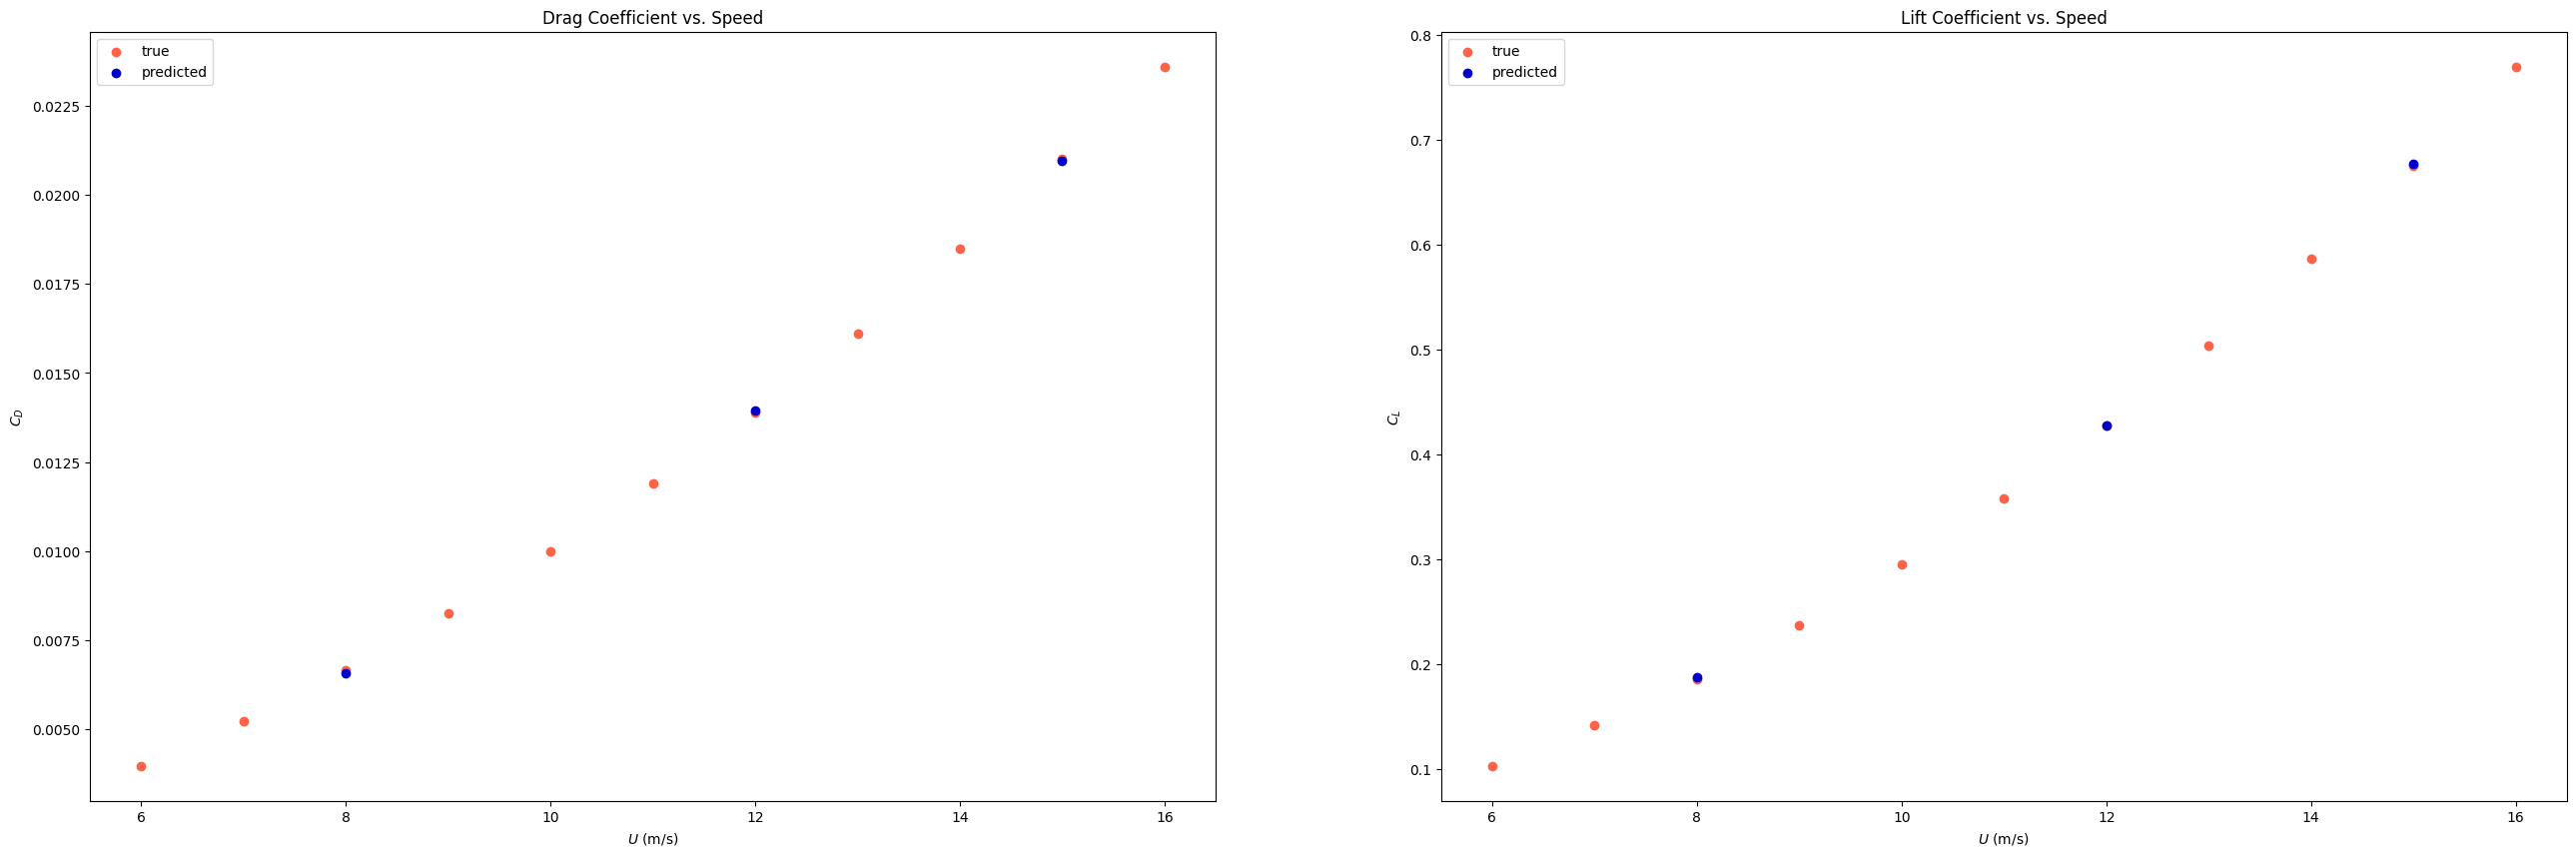

In [74]:
model.eval()
test_output = model(test_x).detach().cpu().numpy()
print(test_output)
print(test_y)

fig = plt.figure(figsize=(32, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(drag_lift.transpose()[0], drag_lift.transpose()[1], c="tomato", label="true")
ax1.scatter(np.transpose(test_x)[0], np.transpose(test_output)[0], c="mediumblue", label="predicted")
ax1.legend()
ax1.set_title("Drag Coefficient vs. Speed")
ax1.set_xlabel("$U $ (m/s)")
ax1.set_ylabel("$C_D$")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(drag_lift.transpose()[0], drag_lift.transpose()[2], c="tomato", label="true")
ax2.scatter(np.transpose(test_x)[0], np.transpose(test_output)[1], c="mediumblue", label="predicted")
ax2.legend()
ax2.set_title("Lift Coefficient vs. Speed")
ax2.set_xlabel("$U$ (m/s)")
ax2.set_ylabel("$C_L$")

# plt.figure(figsize=(16,10))
# plt.scatter(drag_lift.transpose()[0], drag_lift.transpose()[1], c="tomato", label="true")
# plt.scatter(np.transpose(test_x)[0], np.transpose(test_output)[0], c="mediumblue", label="predicted")
# plt.legend()
# plt.show()

# plt.figure(figsize=(16,10))
# plt.scatter(drag_lift.transpose()[0], drag_lift.transpose()[2], c="tomato", label="true")
# plt.scatter(np.transpose(test_x)[0], np.transpose(test_output)[1], c="mediumblue", label="predicted")
# plt.legend()
plt.show()